<a href="https://colab.research.google.com/github/prathameshPatil1606/AI/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Using Machine Learning (AI Project)


 **Import Required Libraries**

We begin by importing the libraries needed for data handling, visualization, model building, and evaluation.


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

**Load the Dataset**

We'll load the Pima Indian Diabetes dataset which contains diagnostic information for predicting diabetes.

In [4]:
# Load the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')

# Display first 5 rows
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Explore the Dataset**

We check the shape of the dataset and the number of diabetic (1) and non-diabetic (0) instances.

Shape: (768, 9)

Class distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


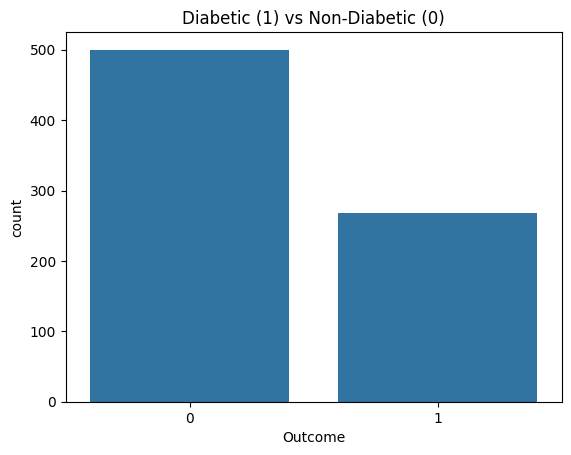

In [5]:
print("Shape:", diabetes_dataset.shape)
print("\nClass distribution:\n", diabetes_dataset['Outcome'].value_counts())

# Visualize class balance
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Diabetic (1) vs Non-Diabetic (0)')
plt.show()


**View Statistical Information**

Display basic statistical measures such as mean, median, and standard deviation.

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Split Features and Target Variable**

We separate the dataset into features (X) and labels (Y).

In [7]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

print("Features used:", list(X.columns))


Features used: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


**Feature Scaling (Normalization)**

Standardizing the feature values so all features contribute equally to model performance.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



**Train-Test Split**

Splitting the dataset into 80% training and 20% testing for model evaluation.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)


**Handle Class Imbalance Using SMOTE**

We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [10]:
smote = SMOTE(random_state=2)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

print("After SMOTE:")
print("X_train shape:", X_train_smote.shape)
print("Y_train distribution:\n", pd.Series(Y_train_smote).value_counts())


After SMOTE:
X_train shape: (800, 8)
Y_train distribution:
 Outcome
1    400
0    400
Name: count, dtype: int64


**Handle Class Imbalance Using SMOTE**

We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [11]:
params = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}

rf = RandomForestClassifier(random_state=2)
grid = GridSearchCV(rf, params, cv=5, n_jobs=-1)
grid.fit(X_train_smote, Y_train_smote)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 100}


**Evaluate the Model**

We check the accuracy of the model on both training and testing datasets.




In [12]:
# Accuracy on training and test data
train_preds = best_rf.predict(X_train_smote)
test_preds = best_rf.predict(X_test)

train_acc = accuracy_score(Y_train_smote, train_preds)
test_acc = accuracy_score(Y_test, test_preds)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 0.95
Test Accuracy: 0.7532467532467533


 **Confusion Matrix**

Plotting the confusion matrix to visualize correct and incorrect predictions.

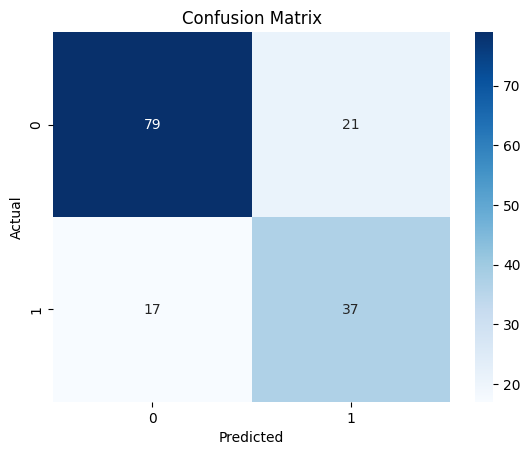

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



In [13]:
# Confusion Matrix
cm = confusion_matrix(Y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(Y_test, test_preds))


**Predict for a New Patient**

We now build a real-world prediction system for new patient input.

0-->Non-diabetec

1-->Diabetec


In [18]:
# Input should match the order of columns in original dataset
# The input data should have 8 features, matching the columns in X
input_data = (0,100,88,60,110,46.8,0.962,31)

# Convert to array and reshape
input_array = np.asarray(input_data).reshape(1, -1)

# Convert to DataFrame with original column names
input_df = pd.DataFrame(input_array, columns=X.columns)

# Standardize input
input_scaled = scaler.transform(input_df)

# Prediction
prediction = best_rf.predict(input_scaled)

if prediction[0] == 1:
    print("The person is diabetic")
else:
    print("The person is not diabetic")

The person is not diabetic
